# PHSX 616: Measuring the Speed of Light
## Dr. Micheal Murray
## Christian Argueta

In [318]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
from scipy.stats import chi2

# Reading the data

In [319]:
df = pd.read_csv('Photoelectric Effect Data3 - Sheet1.csv')

# Extract the data for each column
V1 = df['V1'].tolist()
A1 = df['A1'].tolist()

V2 = df['V2'].tolist()
A2 = df['A2'].tolist()

V3 = df['V3'].tolist()
A3 = df['A3'].tolist()

V4 = df['V4'].tolist()
A4 = df['A4'].tolist()

V5 = df['V5'].tolist()
A5 = df['A5'].tolist()

LAM1 =df['LAMBDA1']
LAM2 =df['LAMBDA2']
LAM3 =df['LAMBDA3']

VStop1 = df['VSTOP1']
VStop2 = df['VSTOP2']
VStop3 = df['VSTOP3']



## ∅8 Voltage and  Current

In [320]:
print(A1)

[-3.6e-11, 2.9e-11, -2.7e-11, -2.6e-11, -2.5e-11, -2.5e-11, -2.4e-11, -2.3e-11, -2.2e-11, -2.1e-11, -2e-11, -1.8e-11, -1.7e-11, -1.6e-11, -1.5e-11, -1.3e-11, -1.2e-11, -1e-11, -9.1e-12, -7.2e-12, -5.4e-12, -3.9e-12, -1.6e-12, 0.0, 2.6e-12, 4.5e-12, 7.3e-12, 9.4e-12, 1.1e-11, 1.5e-11, 1.8e-11, 2.1e-11, 2.4e-11, 2.8e-11, 3.1e-11, 3.5e-11, 3.8e-11, 4.3e-11, 4.5e-11, 5e-11, 5.4e-11, 6e-11, 6.4e-11, 6.9e-11, 1.1e-10, 1.8e-10, 2.7e-10, 3.7e-10, 4.8e-10, 6e-10, 7.1e-10, 8.1e-10, 9.4e-10, 1.1e-09, 1.2e-09, 1.3e-09, 1.4e-09, 1.5e-09, 1.6e-09, 1.8e-09, 1.9e-09, 2e-09, 2.2e-09, 2.3e-09, 2.4e-09, 2.6e-09, 2.8e-09, 3e-09, 3.2e-09, 3.3e-09, 3.5e-09, 3.7e-09, 3.9e-09, 4.1e-09, 4.3e-09, 4.5e-09, 4.7e-09, 5e-09, 5.2e-09]


## Now I want to plot them for ∅8

'PhotoelectricData1.pdf'

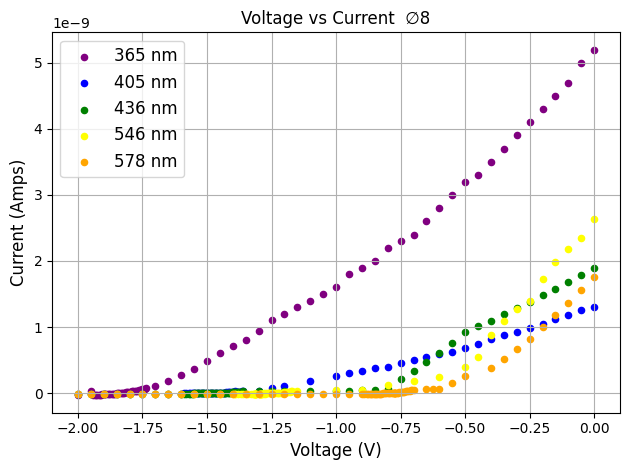

In [321]:
wavelengths = [365, 405, 436, 546, 578]
plt.scatter(V1, A1, label=f'{wavelengths[0]} nm', color='purple', s=20)
plt.scatter(V2, A2, label=f'{wavelengths[1]} nm', color='blue', s=20)
plt.scatter(V2, A3, label=f'{wavelengths[2]} nm', color='green', s=20)
plt.scatter(V3, A4, label=f'{wavelengths[3]} nm', color='yellow', s=20)
plt.scatter(V4, A5, label=f'{wavelengths[4]} nm', color='orange', s=20)

plt.xlabel('Voltage (V)', fontsize=12)
plt.ylabel('Current (Amps)', fontsize=12)
plt.title('Voltage vs Current  ∅8', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Save the plot as a PDF
pdf_filename = 'PhotoelectricData1.pdf'
plt.savefig(pdf_filename)

pdf_filename


# Now lets grab the stopping voltage and current for ∅8

In [322]:
#Only use the first 5 rows for the data
LAM1 = LAM1[:5]
LAM2 = LAM2[:5]
LAM3 = LAM3[:5]

VStop1 = VStop1[:5]
VStop2 = VStop2[:5]
VStop3 = VStop3[:5]

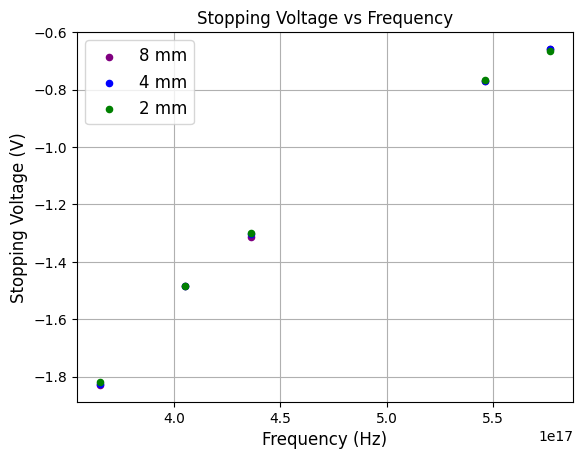

In [323]:
plt.scatter(LAM1, VStop1, label='8 mm', color='purple', s=20)
plt.scatter(LAM2, VStop2, label='4 mm', color='blue', s=20)
plt.scatter(LAM3, VStop3,  label='2 mm', color='green', s=20)

plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Stopping Voltage (V)', fontsize=12)
plt.title('Stopping Voltage vs Frequency', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

#Create a linear fit for the stopping voltage vs frequency

2.6349380534090967e-20
Chi-square for dataset 1: 0.014093896818393244
Chi-square for dataset 2: 0.014569535655938057
Chi-square for dataset 3: 0.01518517360506576
Overall Chi-square for the averaged fit: 0.04395508418895658
Degrees of freedom: 13
P-value: 0.9999999999999912


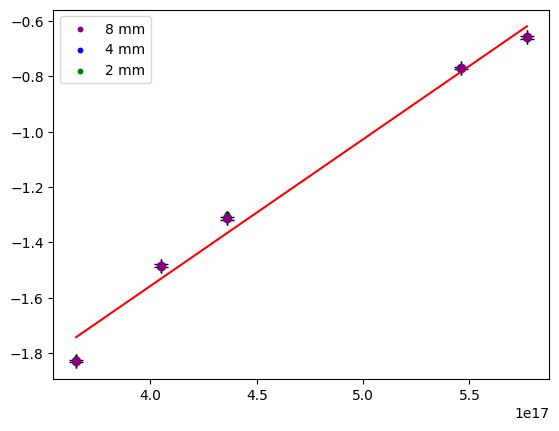

In [337]:
def linear_fit(x, m, b):
    return m * x + b

# Perform curve fitting for each dataset
popt1, _ = curve_fit(linear_fit, LAM1, VStop1)
popt2, _ = curve_fit(linear_fit, LAM2, VStop2)
popt3, _ = curve_fit(linear_fit, LAM3, VStop3)

YaxisError = 0.005
xaxisError = popt3[0] * YaxisError
print(xaxisError)

# Plotting the scatter plots
plt.scatter(LAM1, VStop1, label='8 mm', color='purple', s=10)
plt.scatter(LAM2, VStop2, label='4 mm', color='blue', s=10)
plt.scatter(LAM3, VStop3, label='2 mm', color='green', s=10)
plt.errorbar(LAM1, VStop1, xerr=xaxisError, yerr=YaxisError, fmt='o', color='purple', ecolor='black', capsize=5)

# Plotting the linear fit lines
xFit = np.linspace(min(min(LAM1), min(LAM2), min(LAM3)), max(max(LAM1), max(LAM2), max(LAM3)), 13)
yFit1 = linear_fit(xFit, *popt1)
yFit2 = linear_fit(xFit, *popt2)
yFit3 = linear_fit(xFit, *popt3)

#Make one fit line for all the data by averaging the slopes and intercepts
m = (popt1[0] + popt2[0] + popt3[0]) / 3
b = (popt1[1] + popt2[1] + popt3[1]) / 3
yFit4 = linear_fit(xFit, m, b)


def linear_fit(x, m, b):
    return m * x + b

# Calculate residuals and Chi-square for each dataset
def chi_square(observed, expected):
    return np.sum((observed - expected) ** 2)



chi_square_values = []
for lam, vstop, popt in zip([LAM1, LAM2, LAM3], [VStop1, VStop2, VStop3], [popt1, popt2, popt3]):
    y_fit = linear_fit(lam, *popt)
    chi_sq = chi_square(vstop, y_fit)
    chi_square_values.append(chi_sq)

# Calculating the overall Chi-square for the averaged fit
all_lams = np.concatenate((LAM1, LAM2, LAM3))
all_vstops = np.concatenate((VStop1, VStop2, VStop3))
yFit_all = linear_fit(all_lams, m, b)
overall_chi_sq = chi_square(all_vstops, yFit_all)

# Print Chi-square values
for i, chi_sq in enumerate(chi_square_values, 1):
    print(f"Chi-square for dataset {i}: {chi_sq}")
print(f"Overall Chi-square for the averaged fit: {overall_chi_sq}")

#Calculate the degrees of freedom
dof = len(all_lams) - 2
print(f"Degrees of freedom: {dof}")

#Calculate the p-value


p_value = 1 - chi2.cdf(overall_chi_sq, dof)
print(f"P-value: {p_value}")


# Continue with your plotting code
plt.plot(xFit, yFit4, 'red')
plt.legend()
plt.show()

# Now for the residuals

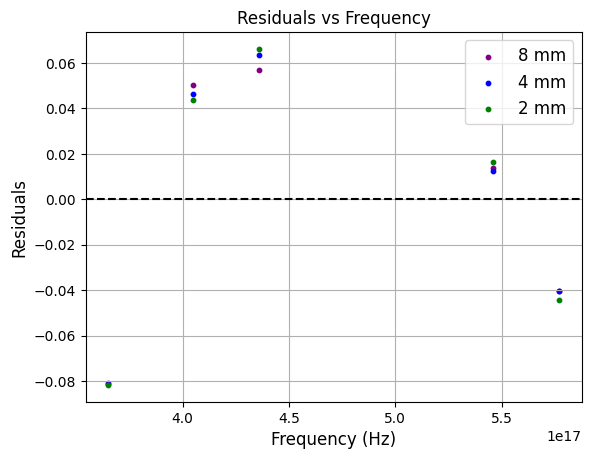

Chi Squared 1: 0.014093896818393244
Chi Squared 2: 0.014569535655938057
Chi Squared 3: 0.01518517360506576


In [325]:
#Lets calculate the residuals and the chi squared values for the linear fit
def residuals(x, y, m, b):
    return y - (m * x + b)

residuals1 = residuals(LAM1, VStop1, *popt1)
residuals2 = residuals(LAM2, VStop2, *popt2)
residuals3 = residuals(LAM3, VStop3, *popt3)

#plot the residuals
plt.scatter(LAM1, residuals1, label='8 mm', color='purple', s=10)
plt.scatter(LAM2, residuals2, label='4 mm', color='blue', s=10)
plt.scatter(LAM3, residuals3, label='2 mm', color='green', s=10)
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)

#Show a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Frequency', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Calculate the chi squared values
chiSquared1 = np.sum((residuals1) ** 2)
chiSquared2 = np.sum((residuals2) ** 2)
chiSquared3 = np.sum((residuals3) ** 2)

print(f'Chi Squared 1: {chiSquared1}')
print(f'Chi Squared 2: {chiSquared2}')
print(f'Chi Squared 3: {chiSquared3}')



# Now combine!

'PhotoelectricEffectData2.pdf'

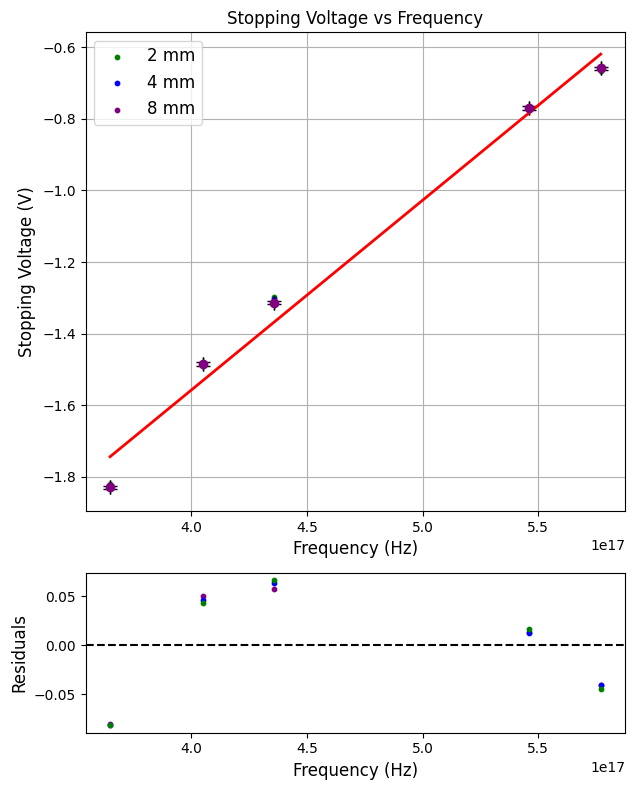

In [340]:
plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 2, height_ratios=[3, 1])  # GridSpec should define the layout for 2 rows and 2 columns

# Use gs to place each subplot in the correct location
plt.subplot(gs[0])
plt.scatter(LAM3, VStop3, label='2 mm', color='green', s=10)
plt.scatter(LAM2, VStop2, label='4 mm', color='blue', s=10)
plt.scatter(LAM1, VStop1, label='8 mm', color='purple', s=10)

plt.errorbar(LAM1, VStop1, xerr=xaxisError, yerr=YaxisError, fmt='o', color='purple', ecolor='black', capsize=5)

plt.plot(xFit, yFit4, color='red',  linewidth=2)

plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Stopping Voltage (V)', fontsize=12)
plt.title('Stopping Voltage vs Frequency', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

plt.subplot(gs[2])  # Changed from gs[1] to gs[2]
plt.scatter(LAM1, residuals1, label='8 mm', color='purple', s=10)
plt.scatter(LAM2, residuals2, label='4 mm', color='blue', s=10)
plt.scatter(LAM3, residuals3, label='2 mm', color='green', s=10)
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.axhline(y=0, color='black', linestyle='--')


plt.tight_layout()

# Saving the entire figure as a PDF
pdf_filename2 = 'PhotoelectricEffectData2.pdf'
plt.savefig(pdf_filename2)

pdf_filename2

In [339]:
# Print the stopping voltages
print("Stopping Voltages for 8 mm dataset:")
print(VStop1)
print("Stopping Voltages for 4 mm dataset:")
print(VStop2)
print("Stopping Voltages for 2 mm dataset:")
print(VStop3)

# Print the wavelengths  
print("Wavelengths for 8 mm dataset:")
print(LAM1)
print("Wavelengths for 4 mm dataset:")
print(LAM2)
print("Wavelengths for 2 mm dataset:")
print(LAM3)

# Print the slopes and intercepts
print("Slope and Intercept for 8 mm dataset:")
print(popt1)
print("Slope and Intercept for 4 mm dataset:")
print(popt2)
print("Slope and Intercept for 2 mm dataset:")
print(popt3)

# Print the residuals
print("Residuals for 8 mm dataset:")
print(residuals1)
print("Residuals for 4 mm dataset:")
print(residuals2)
print("Residuals for 2 mm dataset:")
print(residuals3)

# Print the chi squared values
print("Chi-squared value for 8 mm dataset:")
print(chiSquared1)
print("Chi-squared value for 4 mm dataset:")
print(chiSquared2)
print("Chi-squared value for 2 mm dataset:")
print(chiSquared3)

# Print the p-value
print("P-value:")
print(p_value)

# Print the overall chi squared value
print("Overall Chi-squared value:")
print(overall_chi_sq)

# Print the degrees of freedom
print("Degrees of freedom:")
print(dof)

# Print the chi squared values for each dataset
print("Chi-squared values for each dataset:")
print(chi_square_values)

#Print the popt values
print("Popt values:")
print(popt1)
print(popt2)
print(popt3)


Stopping Voltages for 8 mm dataset:
0   -1.829
1   -1.485
2   -1.313
3   -0.770
4   -0.659
Name: VSTOP1, dtype: float64
Stopping Voltages for 4 mm dataset:
0   -1.825
1   -1.485
2   -1.303
3   -0.770
4   -0.658
Name: VSTOP2, dtype: float64
Stopping Voltages for 2 mm dataset:
0   -1.8200
1   -1.4840
2   -1.2980
3   -0.7680
4   -0.6655
Name: VSTOP3, dtype: float64
Wavelengths for 8 mm dataset:
0    3.650000e+17
1    4.050000e+17
2    4.360000e+17
3    5.460000e+17
4    5.770000e+17
Name: LAMBDA1, dtype: float64
Wavelengths for 4 mm dataset:
0    3.650000e+17
1    4.050000e+17
2    4.360000e+17
3    5.460000e+17
4    5.770000e+17
Name: LAMBDA2, dtype: float64
Wavelengths for 2 mm dataset:
0    3.650000e+17
1    4.050000e+17
2    4.360000e+17
3    5.460000e+17
4    5.770000e+17
Name: LAMBDA3, dtype: float64
Slope and Intercept for 8 mm dataset:
[ 5.32882766e-18 -3.69336792e+00]
Slope and Intercept for 4 mm dataset:
[ 5.31123817e-18 -3.68217474e+00]
Slope and Intercept for 2 mm dataset:
[ 5